## Roll `np.ndarray` axes one position forward

Which is faster to transform an array `arr` (`arr.shape = (a,b,c,d)`) such that `arr.shape` is `(b,c,d,a)`?

In [1]:
import numpy as np
from plot_machinery.plot import data, kernel, plot, repeat_count, clear_kernels

In [2]:
clear_kernels()


@kernel()
def swapaxes(X):
    if X.ndim == 2:
        return X.T
    if X.ndim == 3:
        return np.swapaxes(X, 1, 2).T
    elif X.ndim == 4:
        return np.swapaxes(np.swapaxes(np.swapaxes(X, 0, 2), 2, 3), 0, 1)


@kernel()
def moveaxis(X):
    r = np.arange(X.ndim)
    return np.moveaxis(X, r, np.roll(np.arange(X.ndim), 1))


@data(steps=[10, 25, 50, 100, 250])
def data_gen(step):
    return (np.empty((step, step, step, step), dtype=np.int8),)

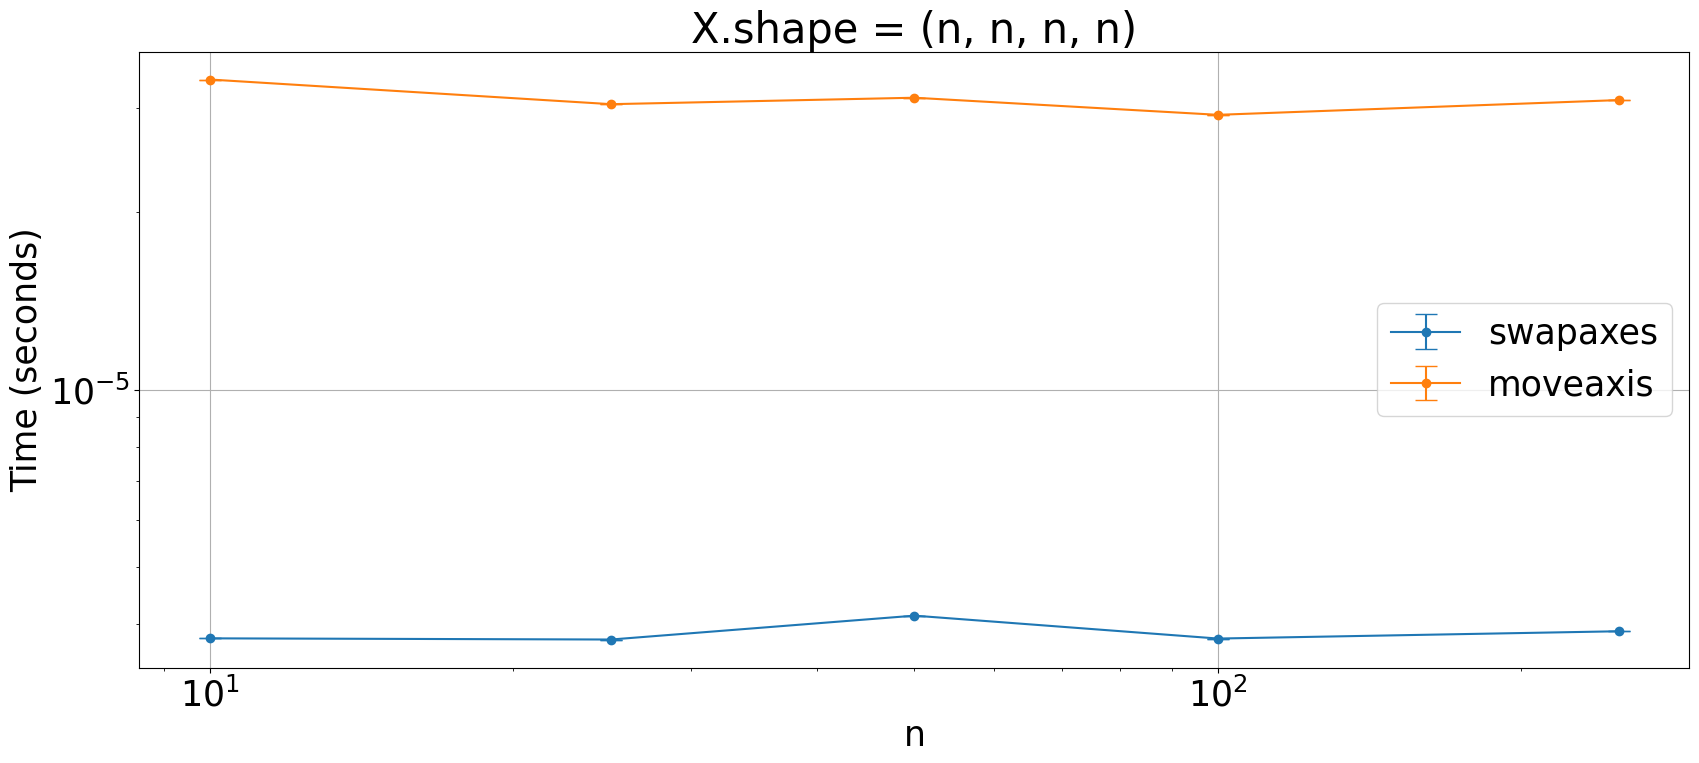

In [3]:
plot(logx=True, logy=True, xlabel="n", title="X.shape = (n, n, n, n)")